__<p style="font-size:180%;"> Pythonøving 5 - TKT4118/MEKT1101 Mekanikk 1</p>__

__Snølast 2__

****

I denne oppgaven skal vi fortsette med den samme problemstillingen som vi var innom i forrige Pythonøving: Det dreier seg om snø på et flatt tak på et uthus, se figur nedenfor, og vi skal analysere snølasten på takbjelken. Senteravstand (ut av planet) mellom takbjelkene er c/c 2,0 m. Måledataene for snøen (koordinat $x$ [m] og vertikal snødybde $h$ [m]) er stadig gitt i fila snødybde.txt. Densiteten til snøen er $\rho_{snø}$ = 400 $\text{kg}/\text{m}^3$.

Som nevnt i oppgaveteksten, skal det brukes regresjon for å tilpasse måledataen til et polynom som videre kan evalueres for ønskede x-verdier.

****
# Definisjon av parametre


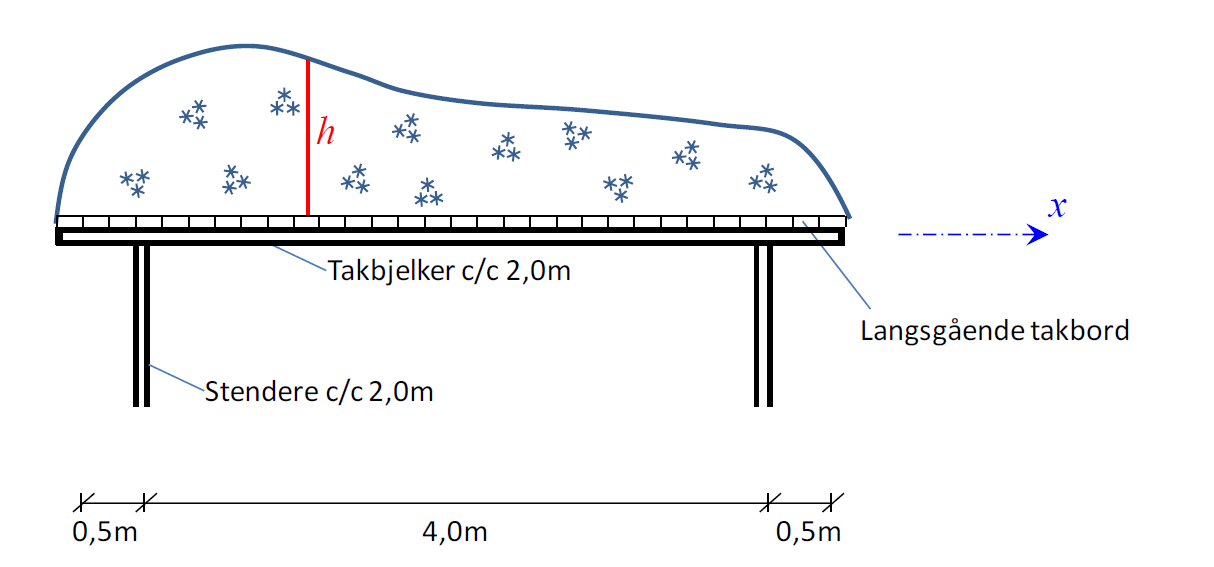

****

Nok en gang er snømålingene lagret i en tekstfil med navn "snødybde.txt", men <font color='red'>denne gangen må du lese inn filen selv.</font> Tekstfilen er fortsatt på formen:


| x-koordinat [m] | Snødybde [m]  | 
|-------|------|
|0.0| 0.0| 
|0.5| 0.95|
|1.0| 1.25| 
|1.5|	1.30|
|2.0|	1.20|
|2.5|	1.10|
|3.0|	1.05|
|3.5|	0.95|
|4.0|	0.85|
|4.5|	0.55|
|5.0|	0.0|


<div class="alert alert-success">

Før snødatane kan tilpasses et polynom, må flere parametre allerede være definert. Gjenta de første stegene som ble gjort i pythonøving 4. Hvis du ikke har gjort øvingen og trenger hjelp, kan du finne løsningsforslag på Blackboard, eller se hintet nedenfor.

Linjelasten $q(x)$ fra snøen er fortsatt:
\begin{equation*}
q(x) = \rho_{snø}*h(x)*c/c*g 
\end{equation*}


***

* Importer verktøyene for beregning (Numpy) og plotting (Matplotlib).
* Definer konstanter som trengs
* Les tekstfilen med snodata (Se hint under!)


* Beregn linjelasten $q(x)$

***
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sno_data = np.genfromtxt("snodybde.txt")

g              = 9.82
rho            = 400.0
stenderavstand = 2.0

def linjelast(x):
    return rho*x[:,1]*stenderavstand*g

linjelast(sno_data)

array([    0. ,  7463.2,  9820. , 10212.8,  9427.2,  8641.6,  8248.8,
        7463.2,  6677.6,  4320.8,     0. ])

<div class="alert alert-block alert-info">
<details>
<summary><b> Trykk for hjelp med å lese inn .txt filen </b></summary>

```python
sno_data = np.genfromtxt("snodybde.txt")  # Les tekstfilen med snodata
```
    
</details>    
</div>

# Regresjon

Vi skal nå se på hvordan vi kan "forbedre" snødataene ved bruk av regresjon.

Linjelasten er bare beskrevet for noen få punkter. Vi kan gjøre et estimat av hva linjelasten er mellom punktene ved å anta at kurven er glatt og dermed at et polynom kan tilnærme linjelasten. Hvis vi har et polynom som beskriver linjelasten kan vi enkelt regne ut verdien av linjelasten ved så mange punkter vi ønsker!
<br>
<br>

For å finne et passende polynom kan vi bruke ferdige funksjoner gjort tilgjengelig i Numpy. Den første av disse er er `np.polyfit("x-verdier", "y-verdier", "polynomorden")`. Den finner koeffisientene som gir best mulig passform på polynomet. Den gir tilbake et array med koeffisienter:
 
\begin{equation*}
\text{koeff} = \text{polyfit}(x_i,f(x_i), \text{polynomorden})
\end{equation*}

hvor funksjonen vi tilpasser er et polynom bygd opp som

\begin{equation*}
f(x) = \text{koeff}[0] + \text{koeff}[1]\cdot x + \text{koeff}[2]\cdot x^2 + ... + \text{koeff}[n] \cdot x^n
\end{equation*}


Disse koeffisientene kan gis videre til en funksjon som heter `np.poly1d("koeffisienter")`, som lager en funksjon som lar oss evaluere polynomet for de verdiene vi ønsker.

Under er et <font color='red'>generisk eksempel</font> på en slik prosedyre:

In [2]:
### EKSEMPEL ###
x_ex = np.arange(0.,2.,0.2) # Vilkårlig eksempeldata for x . x går fra 0 til 2, med steglengde 0.2.
q_ex = x_ex**2.-x_ex+3.     # Vilkårlig eksempeldata for q(x)

# Lag et array med samme endepunkter som x_ex men med mindre skritt.
x_fin = np.arange(0.,2.,0.01)  # x går fra 0 til 2, med steglengde 0.01.

# Finn koeffisientene til et 5. grads polynom og evaluer det for alle verdier i x_fin
koeff_ex   = np.polyfit(x_ex,q_ex,5)
polynom_ex = np.poly1d(koeff_ex)   # polynom_ex er nå en funksjon q(x) som kan evalueres som:
q_ex_fin   = polynom_ex(x_fin)     # Funksjonen blir så evaluert for x definert med kort steglengde. 

Så kan resultatene plottes som:

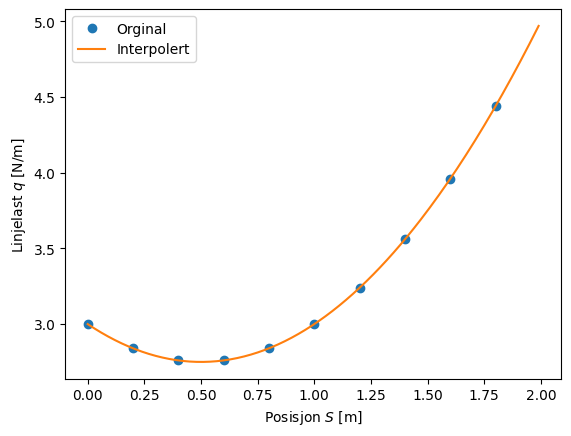

In [3]:
plt.plot(x_ex, q_ex,'o', label="Orginal")
plt.plot(x_fin,q_ex_fin,label="Interpolert")
plt.xlabel("Posisjon $S$ [m]")
plt.ylabel("Linjelast $q$ [N/m]")
plt.legend()
plt.show()

***

<div class="alert alert-success">

Bruk fremgangsmåten presentert ovenfor til å interpolere linjelasten ved bruk av et 5. grads polynom og evaluer det for x-verdier med kortere intervaller for å få flere datapunkter.


* Definer et nytt array $x_{fin}$ med steglengde $\Delta x = 0.05$ m. Dette tilsvarer 10 ganger så mange punkter som den originale målingen.
* Utfør kurvetilpassningen av polynomet og evaluer polynomet med den kortere steglengden.
* Plot de interpolerte målingene sammen med de originale for å se forskjellen.

Bruk kodecellen under.

***
</div>

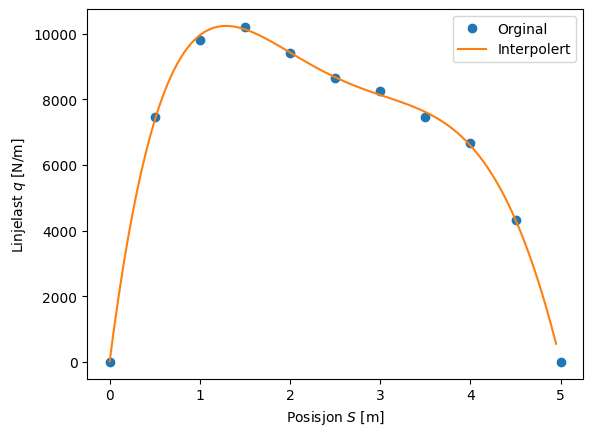

In [25]:
x=np.arange(0.0, 5.0, 0.05)
koeff=np.polyfit(sno_data[:,0], linjelast(sno_data), 5)
polynom=np.poly1d(koeff)
reg_5=polynom(x)

plt.plot(sno_data[:,0], linjelast(sno_data), 'o', label="Orginal")
plt.plot(x, reg_5, label="Interpolert")
plt.xlabel("Posisjon $S$ [m]")
plt.ylabel("Linjelast $q$ [N/m]")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<details>
<summary><b> Trykk for tips </b></summary>

```python
sno_posisjon_fin = np.arange(0, 5, 0.05)
koeff = np.polyfit(sno_posisjon, linjelast, 5)
```

</details>    
</div>

***

<div class="alert alert-success">

Gjenta regresjonen med et 3. gradspolynom og beregn resultantkraften for:
* De originale målingene
* 5. gradspolynomet
* 3. gradspolynomet

Resultantkraften kan stadig regnes ut fra:

\begin{equation*}
R_{snø} = \Delta x \sum^n_{i=1} q(x_i)
\end{equation*}

* Plot de tre tilfellene i samme graf. Holder det å tilpasse med et 3. gradspolynom?

***
</div>

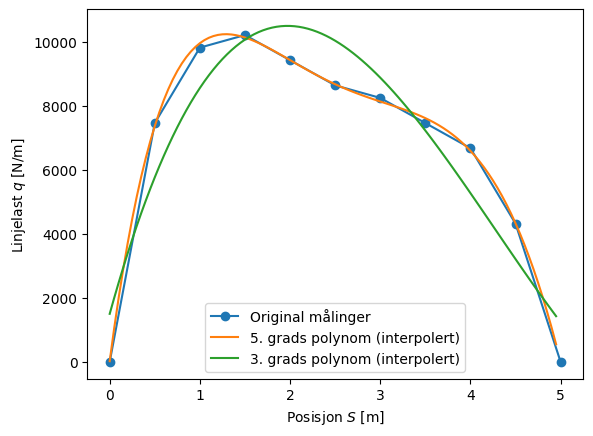

In [41]:
koeff_3=np.polyfit(sno_data[:,0], linjelast(sno_data), 3)
polynom_3=np.poly1d(koeff_3)
reg_3=polynom_3(x)

def resultantkraft_sno(x):
    q=linjelast(x)
    delta_x=0.5
    return delta_x*np.sum(q)

def resultantkraft_q(x):
    q=np.asarray(x)
    delta_x=0.5
    return delta_x*np.sum(q)

r_orginal=resultantkraft_sno(sno_data)
r_reg_5=resultantkraft_q(reg_5)
r_reg_3=resultantkraft_q(reg_3)

plt.plot(sno_data[:,0], linjelast(sno_data), 'o-', label='Original målinger', markersize=6)
plt.plot(x, reg_5,  label='5. grads polynom (interpolert)', linewidth=1.5)
plt.plot(x, reg_3,  label='3. grads polynom (interpolert)', linewidth=1.5)
plt.xlabel("Posisjon $S$ [m]")
plt.ylabel("Linjelast $q$ [N/m]")
plt.legend()
plt.show()

****